In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     ------------------------------------  245.8/250.0 kB 14.7 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00


In [7]:

data=pd.read_excel(r"C:\Users\hp\Downloads\telcom_data.xlsx")


In [8]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Task 4.1

 Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

In [9]:
session_frequency = data.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [13]:
len(session_frequency)

150001

In [14]:
# Calculate session duration by subtracting "End ms" from "Start ms"
Session_Duration = data['Dur. (ms)']
len(Session_Duration)

150001

In [15]:
total_traffic = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
len(total_traffic)


150001

In [16]:
data['Session Frequency'] = session_frequency
data['Session Duration'] = Session_Duration
data['Total Traffic'] = total_traffic

In [17]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Frequency,Session Duration,Total Traffic
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,2.0,1823652.0,345629377.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,2.0,1365104.0,707185356.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,1.0,1361762.0,307690973.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,1.0,1321509.0,889352748.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,1.0,1089009.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,1.0,81230.0,631804110.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,2.0,97970.0,705783925.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,1.0,98249.0,627698629.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,1.0,97910.0,401522016.0


In [18]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [19]:
# Aggregate the metrics per customer id (MSISDN) and report the top 10 customers per engagement metric
aggregated_data = data.groupby('MSISDN/Number').agg({
    'Session Frequency': 'sum',
    'Session Duration': 'sum',
    'Total Traffic': 'sum',})

In [20]:
aggregated_data

,Session Frequency,Session Duration,Total Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197021e+12,1.0,877385.0,2.321240e+08


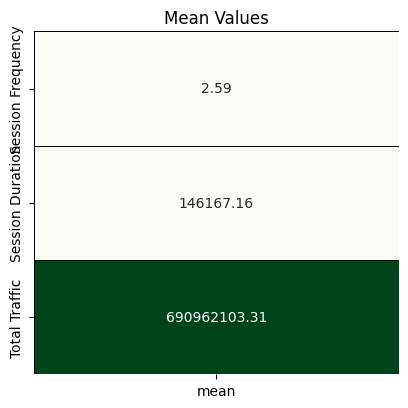

In [21]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#7789B2','#7789B2']
plt.subplot(1,1,1)
sns.heatmap(aggregated_data.describe().T[['mean']],
            cmap = 'Greens',
            annot = True,
            fmt = '.2f',
            linecolor = 'black',
            linewidths = 0.4,
            cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
from sklearn.cluster import KMeans
kmeans=KMeans()

In [23]:
aggregated_data['Session Frequency']=mms.fit_transform(aggregated_data[['Session Frequency']])
aggregated_data['Session Duration']=mms.fit_transform(aggregated_data[['Session Duration']])
aggregated_data['Total Traffic']=mms.fit_transform(aggregated_data[['Total Traffic']])


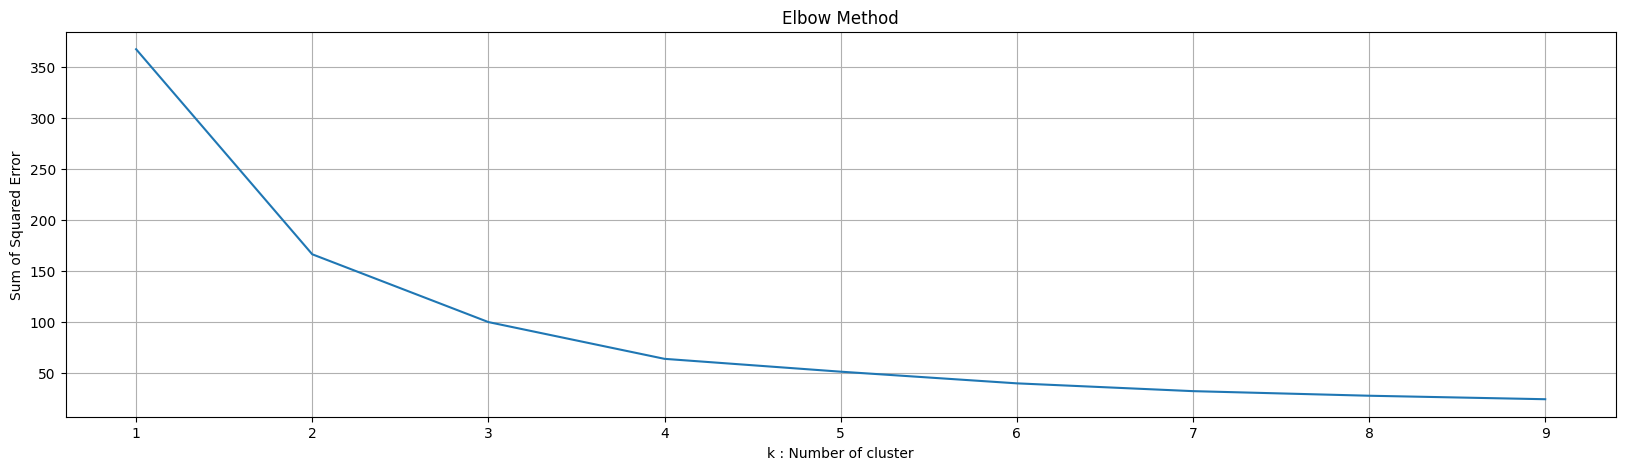

In [24]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(aggregated_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [25]:
user_data = aggregated_data[['Session Frequency', 'Session Duration', 'Total Traffic']].values


In [27]:
model = KMeans(n_clusters = 2,max_iter = 1000)

In [28]:
model.fit(user_data)

KMeans(max_iter=1000, n_clusters=2)

In [29]:
# Finding the cluster centroids
cluster = model.cluster_centers_
cluster

array([[0.00149791, 0.00591935, 0.05700977],
       [0.02481702, 0.01663238, 0.17673724]])

In [30]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
centroids = np.array(cluster)
centroids

array([[0.00149791, 0.00591935, 0.05700977],
       [0.02481702, 0.01663238, 0.17673724]])

In [34]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(user_data, centroids)

less_engaged_cluster_index = 0

engagement_scores = distances[:, less_engaged_cluster_index]

mms = MinMaxScaler()
engagement_scores = mms.fit_transform(engagement_scores.reshape(-1, 1))

aggregated_data['Engagement Score'] = engagement_scores

aggregated_data


,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,0.000000,0.005908,0.095931,0.023260
3.360100e+10,0.000000,0.009387,0.014026,0.025868
3.360100e+10,0.000000,0.006892,0.063851,0.003460
3.360101e+10,0.000000,0.002304,0.044148,0.007418
3.360101e+10,0.009288,0.001615,0.161598,0.064262
...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.077317,0.012223
3.379000e+10,0.000000,0.007217,0.050727,0.003160
3.197021e+12,0.000000,0.046922,0.022566,0.032341


Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.


Experience analysis

In [37]:
# Calculate average TCP retransmission
avg_tcp_retransmission = data.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)
# Calculate average RTT
avg_rtt = data.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

In [38]:
# Calculate average throughput
avg_throughput = data.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)
avg_throughput.fillna(avg_throughput.mean(), inplace=True)
handset_mode = data.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)


In [39]:
# Create a new DataFrame with aggregated information
aggregated_data1 = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
})

# Reset the index to make 'MSISDN/Number' a column instead of the index
aggregated_data1.reset_index(inplace=True)

# Display the aggregated data
aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput
0,3.360100e+10,8.463363e+06,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
1,3.360100e+10,8.463363e+06,15.500000,Apple iPhone 7 (A1778),49.5
2,3.360100e+10,8.463363e+06,68.269961,undefined,48.5
3,3.360101e+10,1.066000e+03,42.000000,Apple iPhone 5S (A1457),124.0
4,3.360101e+10,4.685416e+06,29.750000,Apple iPhone Se (A1723),14211.0
...,...,...,...,...,...
106851,3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.5
106852,3.379000e+10,8.463363e+06,20.000000,Apple iPhone 8 Plus (A1897),58.0
106853,3.197021e+12,8.463363e+06,68.269961,Quectel Wireless. Quectel Ec25-E,0.5
106854,3.370000e+14,8.463363e+06,68.269961,Huawei B525S-23A,16.5


Data Scaling

aggregated_data1['Avg_TCP_Retransmission']=mms.fit_transform(aggregated_data1[['Avg_TCP_Retransmission']])
aggregated_data1['Avg_RTT']=mms.fit_transform(aggregated_data1[['Avg_RTT']])
aggregated_data1['Avg_Throughput']=mms.fit_transform(aggregated_data1[['Avg_Throughput']])


In [40]:
aggregated_data1['Avg_TCP_Retransmission']=mms.fit_transform(aggregated_data1[['Avg_TCP_Retransmission']])
aggregated_data1['Avg_RTT']=mms.fit_transform(aggregated_data1[['Avg_RTT']])
aggregated_data1['Avg_Throughput']=mms.fit_transform(aggregated_data1[['Avg_Throughput']])


In [41]:
user_data = aggregated_data1[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].values


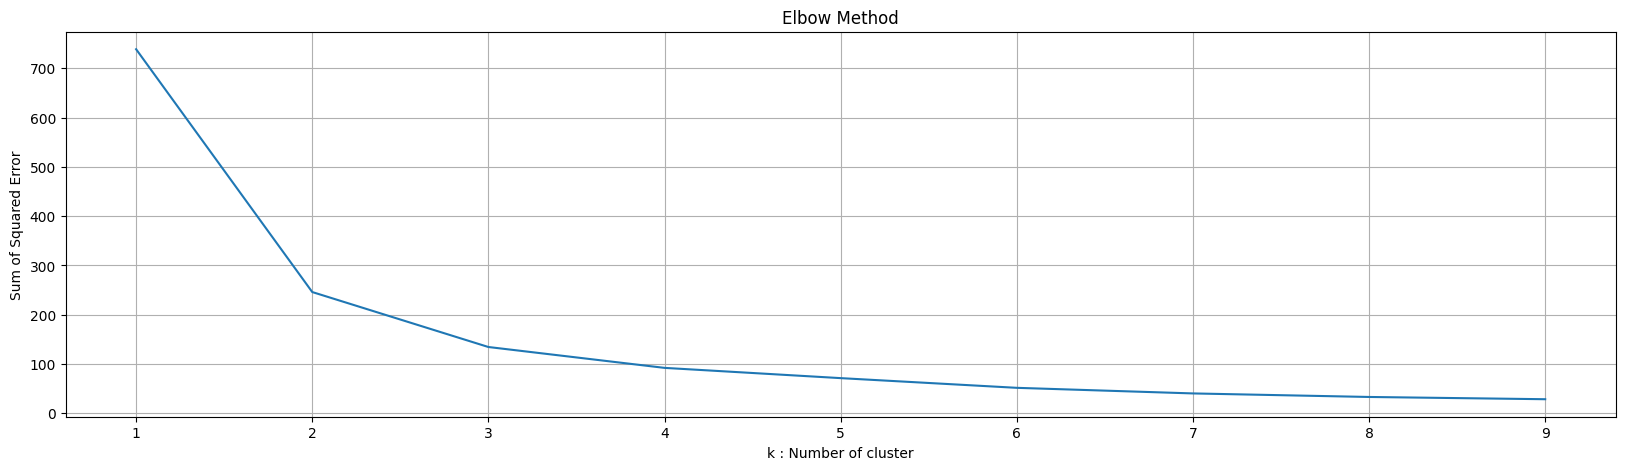

In [42]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()


In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,max_iter = 1000)
model.fit(user_data)

KMeans(max_iter=1000, n_clusters=2)

In [44]:
# Finding the cluster centroids
cluster = model.cluster_centers_
cluster

labels = model.labels_
labels

centroids= np.array(cluster)
centroids

array([[0.00200315, 0.00148074, 0.01541995],
       [0.00621153, 0.00106123, 0.19546054]])

In [45]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
cluster_centroids = centroids

distances = euclidean_distances(user_data, cluster_centroids)

worst_experience_cluster_index = cluster_centroids.shape[0] - 1

experience_scores = distances[:, worst_experience_cluster_index]

mms = MinMaxScaler()
experience_scores = mms.fit_transform(experience_scores.reshape(-1, 1))

aggregated_data1['Experience Score'] = experience_scores

aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Experience Score
0,3.360100e+10,2.725529e-03,0.000475,Huawei P20 Lite Huawei Nova 3E,0.000268,0.191177
1,3.360100e+10,2.725529e-03,0.000320,Apple iPhone 7 (A1778),0.000349,0.191098
2,3.360100e+10,2.725529e-03,0.001409,undefined,0.000342,0.191104
3,3.360101e+10,3.426491e-07,0.000867,Apple iPhone 5S (A1457),0.000873,0.190647
4,3.360101e+10,1.508884e-03,0.000614,Apple iPhone Se (A1723),0.100102,0.093106
...,...,...,...,...,...,...
106851,3.379000e+10,3.510881e-05,0.000537,Huawei Honor 9 Lite,0.036505,0.155636
106852,3.379000e+10,2.725529e-03,0.000413,Apple iPhone 8 Plus (A1897),0.000409,0.191039
106853,3.197021e+12,2.725529e-03,0.001409,Quectel Wireless. Quectel Ec25-E,0.000004,0.191436
106854,3.370000e+14,2.725529e-03,0.001409,Huawei B525S-23A,0.000116,0.191325


In [47]:
aggregated_data

,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,0.000000,0.005908,0.095931,0.023260
3.360100e+10,0.000000,0.009387,0.014026,0.025868
3.360100e+10,0.000000,0.006892,0.063851,0.003460
3.360101e+10,0.000000,0.002304,0.044148,0.007418
3.360101e+10,0.009288,0.001615,0.161598,0.064262
...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.077317,0.012223
3.379000e+10,0.000000,0.007217,0.050727,0.003160
3.197021e+12,0.000000,0.046922,0.022566,0.032341


In [48]:
aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Experience Score
0,3.360100e+10,2.725529e-03,0.000475,Huawei P20 Lite Huawei Nova 3E,0.000268,0.191177
1,3.360100e+10,2.725529e-03,0.000320,Apple iPhone 7 (A1778),0.000349,0.191098
2,3.360100e+10,2.725529e-03,0.001409,undefined,0.000342,0.191104
3,3.360101e+10,3.426491e-07,0.000867,Apple iPhone 5S (A1457),0.000873,0.190647
4,3.360101e+10,1.508884e-03,0.000614,Apple iPhone Se (A1723),0.100102,0.093106
...,...,...,...,...,...,...
106851,3.379000e+10,3.510881e-05,0.000537,Huawei Honor 9 Lite,0.036505,0.155636
106852,3.379000e+10,2.725529e-03,0.000413,Apple iPhone 8 Plus (A1897),0.000409,0.191039
106853,3.197021e+12,2.725529e-03,0.001409,Quectel Wireless. Quectel Ec25-E,0.000004,0.191436
106854,3.370000e+14,2.725529e-03,0.001409,Huawei B525S-23A,0.000116,0.191325


Task 4.2 - Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

In [49]:
df = pd.DataFrame({
    'MSISDN/Number': aggregated_data.index,
    'Engagement Score': aggregated_data['Engagement Score']
})

df = df.reset_index(drop=True)

df['Experience Score'] = experience_scores
df

,MSISDN/Number,Engagement Score,Experience Score
0,3.360100e+10,0.023260,0.191177
1,3.360100e+10,0.025868,0.191098
2,3.360100e+10,0.003460,0.191104
3,3.360101e+10,0.007418,0.190647
4,3.360101e+10,0.064262,0.093106
...,...,...,...
106851,3.379000e+10,0.012223,0.155636
106852,3.379000e+10,0.003160,0.191039
106853,3.197021e+12,0.032341,0.191436
106854,3.370000e+14,0.005384,0.191325


In [50]:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2
df['Satisfaction Score']

0         0.107218
1         0.108483
2         0.097282
3         0.099033
4         0.078684
            ...   
106851    0.083930
106852    0.097099
106853    0.111888
106854    0.098354
106855    0.114075
Name: Satisfaction Score, Length: 106856, dtype: float64

In [51]:
df

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,0.023260,0.191177,0.107218
1,3.360100e+10,0.025868,0.191098,0.108483
2,3.360100e+10,0.003460,0.191104,0.097282
3,3.360101e+10,0.007418,0.190647,0.099033
4,3.360101e+10,0.064262,0.093106,0.078684
...,...,...,...,...
106851,3.379000e+10,0.012223,0.155636,0.083930
106852,3.379000e+10,0.003160,0.191039,0.097099
106853,3.197021e+12,0.032341,0.191436,0.111888
106854,3.370000e+14,0.005384,0.191325,0.098354


In [52]:
top_10_satisfied_customers = df.sort_values(by='Satisfaction Score', ascending=False).head(10)
print(top_10_satisfied_customers)

       MSISDN/Number  Engagement Score  Experience Score  Satisfaction Score
13180   3.362578e+10          1.000000          0.149057            0.574528
13526   3.362632e+10          0.861383          0.168177            0.514780
47983   3.366232e+10          0.019786          1.000000            0.509893
33226   3.365889e+10          0.001555          0.976368            0.488962
6437    3.361489e+10          0.869404          0.104740            0.487072
92923   3.376054e+10          0.770483          0.148701            0.459592
61964   3.366610e+10          0.001551          0.858277            0.429914
37052   3.365973e+10          0.714667          0.129667            0.422167
76363   3.367588e+10          0.690969          0.144511            0.417740
37838   3.365991e+10          0.007507          0.790254            0.398880


Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
X = df[['Engagement Score', 'Experience Score']]
y = df['Satisfaction Score']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

array([0.09826678, 0.09798491, 0.10471022, ..., 0.14473585, 0.08808029,
       0.06039717])

In [56]:
y_test

64473    0.098267
83243    0.097985
39296    0.104710
44869    0.074709
99282    0.098062
           ...   
67669    0.059076
63720    0.096074
16701    0.144736
44897    0.088080
97963    0.060397
Name: Satisfaction Score, Length: 21372, dtype: float64

In [57]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 6.32368844165529e-33


In [58]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 6.83758806587772e-17


In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

In [60]:
from sklearn.cluster import KMeans
# Prepare the data for clustering
data = df[['Engagement Score', 'Experience Score']]
X = data.values


In [61]:
# Run K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=2, random_state=42)

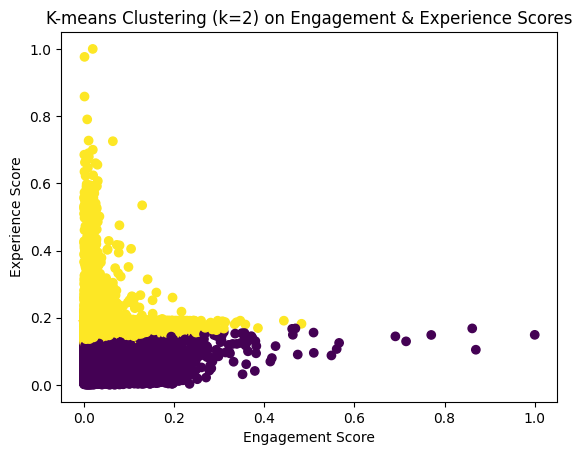

In [62]:

# Get the cluster labels
cluster_labels = kmeans.labels_
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering (k=2) on Engagement & Experience Scores')
plt.show()

Task 4.5 - Aggregate the average satisfaction & experience score per cluster.


In [63]:
# Create a new DataFrame with cluster labels and satisfaction/experience scores
cluster_data = pd.DataFrame({'Cluster': cluster_labels, 'Satisfaction Score': df['Satisfaction Score'], 'Experience Score': df['Experience Score']})
# Calculate the average satisfaction and experience score per cluster
cluster_agg = cluster_data.groupby('Cluster').mean()
cluster_agg

,Satisfaction Score,Experience Score
Cluster,,
0,0.052277,0.070924
1,0.103129,0.185012


In [64]:
cluster_agg.columns

Index(['Satisfaction Score', 'Experience Score'], dtype='object')

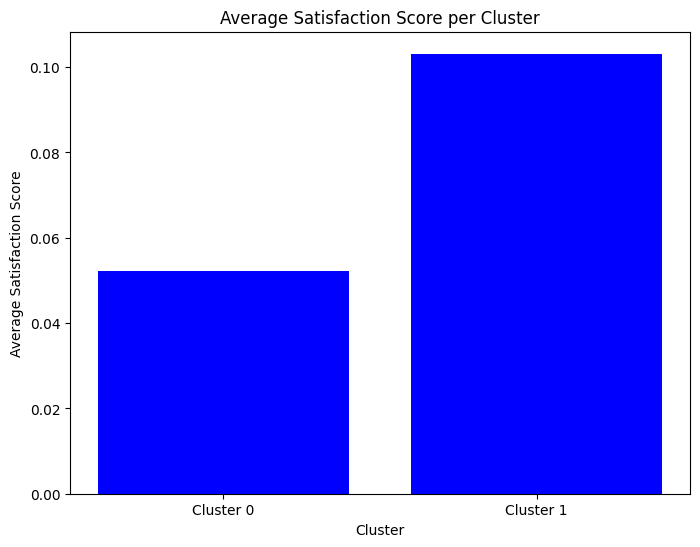

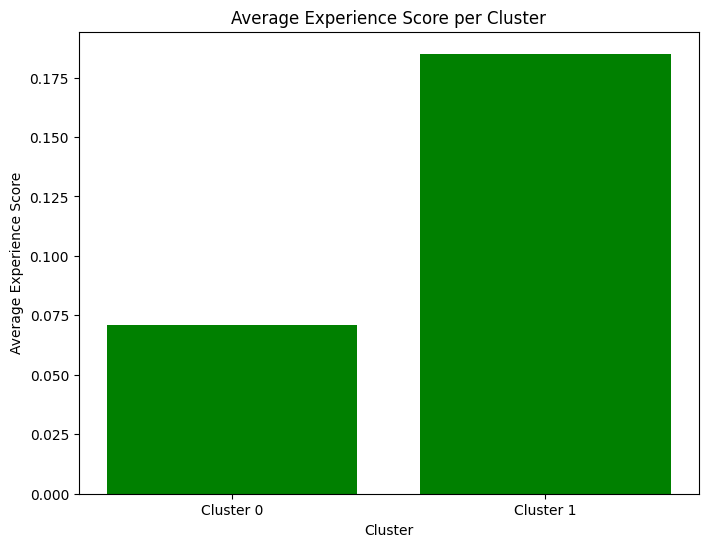

In [65]:
# Define the cluster labels and average scores
cluster_labels = ['Cluster 0', 'Cluster 1']
avg_satisfaction_scores = cluster_agg['Satisfaction Score']
avg_experience_scores =cluster_agg['Experience Score']

# Plot the average satisfaction scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_satisfaction_scores, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score per Cluster')

# Display the plot
plt.show()

# Plot the average experience scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_experience_scores, color='green')
plt.xlabel('Cluster')
plt.ylabel('Average Experience Score')
plt.title('Average Experience Score per Cluster')

# Display the plot
plt.show()

In [66]:
df

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,0.023260,0.191177,0.107218
1,3.360100e+10,0.025868,0.191098,0.108483
2,3.360100e+10,0.003460,0.191104,0.097282
3,3.360101e+10,0.007418,0.190647,0.099033
4,3.360101e+10,0.064262,0.093106,0.078684
...,...,...,...,...
106851,3.379000e+10,0.012223,0.155636,0.083930
106852,3.379000e+10,0.003160,0.191039,0.097099
106853,3.197021e+12,0.032341,0.191436,0.111888
106854,3.370000e+14,0.005384,0.191325,0.098354


In [67]:
df.to_csv('Final_Table.csv')

In [68]:
excel_file_path = "output.xlsx"
df.to_excel(excel_file_path, index=False)

In [69]:
!pip install pyodbc

                                              0.0/69.7 kB ? eta -:--:--
     ---------------------------------------- 69.7/69.7 kB 1.9 MB/s eta 0:00:00


In [70]:
import pyodbc

In [71]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [77]:
# Establish a connection to the SQL Server database
conn = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='DESKTOP-E3KDS63\SQLEXPRESS',
    Database='trial'
)

cursor = conn.cursor()

In [82]:
df.head()

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,0.023260,0.191177,0.107218
1,3.360100e+10,0.025868,0.191098,0.108483
2,3.360100e+10,0.003460,0.191104,0.097282
3,3.360101e+10,0.007418,0.190647,0.099033
4,3.360101e+10,0.064262,0.093106,0.078684


In [80]:
df.columns

Index(['MSISDN/Number', 'Engagement Score', 'Experience Score',
       'Satisfaction Score'],
      dtype='object')

changing the column name to remove the we won't have much error

In [103]:
column_mapping = {
    'MSISDN/Number': 'MSISDN_Number',
    'Engagement Score': 'Engagement_Score',
    'Experience Score': 'Experience_Score',
    'Satisfaction Score': 'Satisfaction_Score'
}

# Rename the columns in the DataFrame
df = df.rename(columns=column_mapping)

creating the databse in the sql table

In [94]:
cursor.execute("CREATE TABLE Nexthike (MSISDN_Number float, Engagement_Score float, Experience_Score float, Satisfaction_Score float)")


updating the database in the sql table

In [104]:
for row in df.itertuples():
    cursor.execute(''' 
                   INSERT INTO trial.dbo.Nexthike(MSISDN_Number,Engagement_Score,Experience_Score,Satisfaction_Score)
                   VALUES (?,?,?,?)
                   ''',
                    row.MSISDN_Number,
                    row.Engagement_Score ,
                    row.Experience_Score ,
                    row.Satisfaction_Score
                    )
    
conn.commit()

checking the table is updated

In [108]:
cursor.execute("SELECT TOP 5 MSISDN_Number, Engagement_Score, Experience_Score, Satisfaction_Score FROM trial.dbo.Nexthike")
results = cursor.fetchall()

# Print column names
column_names = [column[0] for column in cursor.description]
print(column_names)

# Print data
for row in results:
    print(row)


['MSISDN_Number', 'Engagement_Score', 'Experience_Score', 'Satisfaction_Score']
(33601001722.0, 0.023260010339481583, 0.19117685793303577, 0.10721843413625867)
(33601001754.0, 0.025867931117741428, 0.19109774571870464, 0.10848283841822304)
(33601002511.0, 0.0034596573088861017, 0.1911035896074672, 0.09728162345817665)
(33601007832.0, 0.007418323932468782, 0.19064733082400992, 0.09903282737823935)
(33601008617.0, 0.06426199051276738, 0.0931055263936434, 0.07868375845320538)


In [73]:
pip install mysql-connector-python

                                              0.0/9.6 MB ? eta -:--:--
     -                                        0.4/9.6 MB 8.1 MB/s eta 0:00:02
     ---                                      0.8/9.6 MB 8.4 MB/s eta 0:00:02
     ----                                     1.1/9.6 MB 7.9 MB/s eta 0:00:02
     -----                                    1.4/9.6 MB 8.1 MB/s eta 0:00:02
     -------                                  1.8/9.6 MB 7.4 MB/s eta 0:00:02
     --------                                 2.1/9.6 MB 7.8 MB/s eta 0:00:01
     ---------                                2.4/9.6 MB 7.6 MB/s eta 0:00:01
     -----------                              2.7/9.6 MB 7.5 MB/s eta 0:00:01
     ------------                             3.0/9.6 MB 7.4 MB/s eta 0:00:01
     -------------                            3.3/9.6 MB 7.3 MB/s eta 0:00:01
     --------------                           3.6/9.6 MB 7.2 MB/s eta 0:00:01
     ----------------                         4.0/9.6 MB 7.2 MB/s eta 0

In [74]:
import mysql.connector

In [75]:
conn= mysql.connector.connect(host ='localhost',
                              password='kapil',
                                user='root' )

In [76]:
if conn.is_connected():
    print("connection Established")

connection Established


here we have uploaded the dataset to the sql